## Applied Plotting, Charting & Data Representation - IBM


In this notebook, I analyze energy productions and consumptions in the *Provence Alpes Cote-d'Azur* region in France and use plotting to visualize the information contained in the databases.

#### Table of content
1. Data Resources
2. Data Analysis
3. Data Visualization
4. Conclusion

###  1. Data Resources

* Ressources publicly available from the French Government Website at:
    * [Final annual French electricity production (GWh) by branch and by territory (administrative region) 2008 to 2017](https://www.data.gouv.fr/en/datasets/production-regionale-annuelle-par-filiere-2008-a-2017-1/)
    * [Final annual electricity consumption (excluding losses) (GWh), corrected for weather effects, by administrative region from 2006 to 2017](https://www.data.gouv.fr/en/datasets/consommation-annuelle-finale-regionale-delectricite-2006-a-2017/)
    * [Daily consolidated electricity withdrawals by territory (administrative region) 2019](https://www.data.gouv.fr/en/datasets/soutirages-regionaux-quotidiens-consolides-sur-le-reseau-de-transport-delectricite-2019/)
        

### 2. Data Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


#### DATAFRAME 1: Final annual French electricity production (GWh) by branch and by territory (administrative region) 2008 to 2017

In [2]:
# DATAFRAME 1: Production by sector 
prod_df= pd.read_csv('prod-region-annuelle-filiere.csv',
                           header= 0,
                           sep=';',
                           index_col= 0,
                           parse_dates=True)

prod_df.rename({'Production nucléaire (GWh)':'Nuclear Production (GWh)',
                'Production thermique (GWh)':'Thermal Electricity Production (GWh)',
                'Production hydraulique (GWh)':'Hydropower (GWh)',
                'Production éolienne (GWh)':'Wind Power Generation (GWh)',
                'Production solaire (GWh)':'Solar Power Production (GWh)',
                'Production bioénergies (GWh)': 'Bioenergy (GWh)'},
                axis= 'columns', inplace=True)
prod_df= prod_df.sort_index().fillna(0)

# total production column
col_list= list(prod_df.loc[:,'Nuclear Production (GWh)':'Bioenergy (GWh)'])
prod_df['Total Production (GWh)']= prod_df[col_list].sum(axis=1)


# national yearly total production mean
prod_grouped_national= prod_df.groupby([prod_df.index]).agg({'Total Production (GWh)':['mean']})
print('National',prod_grouped_national)

# regional yearly total production mean
prod_grouped_regional= prod_df.groupby([prod_df.index,'Région']).agg({'Total Production (GWh)':['sum']})
print('Regional', prod_grouped_regional)

# Regional Production data
provence_df= prod_df.loc[prod_df['Région']=='Provence-Alpes-Côte d\'Azur'].sort_index().fillna(0)


National            Total Production (GWh)
                             mean
Année                            
2008-01-01           42243.138462
2009-01-01           39933.369231
2010-01-01           42314.369231
2011-01-01           41730.461538
2012-01-01           41656.661538
2013-01-01           42346.015385
2014-01-01           41566.146154
2015-01-01           42058.953846
2016-01-01           40878.238462
2017-01-01           40710.446154
Regional                                       Total Production (GWh)
                                                         sum
Année      Région                                           
2008-01-01 Auvergne-Rhône-Alpes                     117116.7
           Bourgogne-Franche-Comté                    3175.1
           Bretagne                                   1581.1
           Centre-Val de Loire                       79539.4
           Corse                                      1395.2
           Grand-Est                                

#### DATAFRAME 2: Final annual electricity consumption (excluding losses) (GWh), corrected for weather effects, by administrative region from 2006 to 2017

In [3]:
# DATAFRAME 2: Consumption by region dataframe
conso_df= pd.read_csv('conso-nette-regionale.csv',
                      header=0,
                      sep=';',
                      index_col=0,
                      parse_dates=True)
conso_df= conso_df.loc['2008-01-01':,:]


# Consumption data
conso_provence_df= conso_df.loc[conso_df['Région']=='Provence-Alpes-Côte d\'Azur'].sort_index()
conso_national_df= conso_df.groupby([conso_df.index])['Consommation nette corrigée (GWh)'].mean().round(2)
print(prod_df.head())
print('conso nationale df',conso_national_df)

# map data
#mapdata= mapdata.groupby(['Région','Géo-shape région']).agg({'Total Production (GWh)':['sum']})
#print(mapdata)

            Code INSEE région              Région  Nuclear Production (GWh)  \
Année                                                                         
2008-01-01                 32     Hauts-de-France                   37567.0   
2008-01-01                 75  Nouvelle-Aquitaine                   48952.0   
2008-01-01                 44           Grand-Est                   84367.0   
2008-01-01                 28           Normandie                   68493.0   
2008-01-01                 76           Occitanie                   17650.0   

            Thermal Electricity Production (GWh)  Hydropower (GWh)  \
Année                                                                
2008-01-01                                8820.0               6.0   
2008-01-01                                1686.0            4318.0   
2008-01-01                               10387.0            9582.0   
2008-01-01                                8195.0             149.0   
2008-01-01                

#### DATAFRAME 3: Daily consolidated electricity withdrawals by territory (administrative region) 2019

In [4]:
# DATAFRAME 3: Withdrawal and Allocation 2019
withdrawals_df= pd.read_csv('soutirages-regionaux-quotidiens-consolides-rpt.csv',
                         header=0,
                         sep=';',
                         index_col=0,
                         parse_dates=True).sort_index()
print(withdrawals_df.head())

print('List of categories within Sector column:', set(withdrawals_df['Secteur activité']))

# Create dataframes for each sector
provence_tertiaire= withdrawals_df[(withdrawals_df['Région']=='Provence-Alpes-Côte d\'Azur') & (withdrawals_df['Secteur activité']=='Tertiaire')]
provence_grande_industrie= withdrawals_df[(withdrawals_df['Région']=='Provence-Alpes-Côte d\'Azur') & (withdrawals_df['Secteur activité']=='Grande Industrie')]
provence_autre= withdrawals_df[(withdrawals_df['Région']=='Provence-Alpes-Côte d\'Azur') & (withdrawals_df['Secteur activité']=='Autre')]

# Series to plot:
tertiaire_serie= provence_tertiaire.iloc[:,5:-3].resample('Y').sum()
grande_industrie_serie= provence_grande_industrie.iloc[:,5:-3].resample('Y').sum()
autre_serie= provence_autre.iloc[:,5:-3].resample('Y').sum()
print(tertiaire_serie, grande_industrie_serie, autre_serie )

# Dataframe
tertiaire= tertiaire_serie.iloc[0]
industrial= grande_industrie_serie.iloc[0]
other= autre_serie.iloc[0]
print(type(industrial))
data= {'Tertiary': tertiaire, 'Industrial': industrial, 'Other': other}
Heatmap_df= pd.DataFrame.from_dict(data,orient= 'index')
print(Heatmap_df)

            Code INSEE région                   Région  Secteur activité  \
Date                                                                       
2019-01-01                 28                Normandie             Autre   
2019-01-01                 27  Bourgogne-Franche-Comté         Tertiaire   
2019-01-01                 11            Ile-de-France         Tertiaire   
2019-01-01                 11            Ile-de-France             Autre   
2019-01-01                 11            Ile-de-France  Grande Industrie   

            Code tension raccordement Tension raccordement    00h00    00h30  \
Date                                                                           
2019-01-01                          4                90 kV   20.082   18.940   
2019-01-01                          6               225 kV    2.456    2.513   
2019-01-01                          4                90 kV    8.005    6.609   
2019-01-01                          6               225 kV  136.130

### Data Visualization

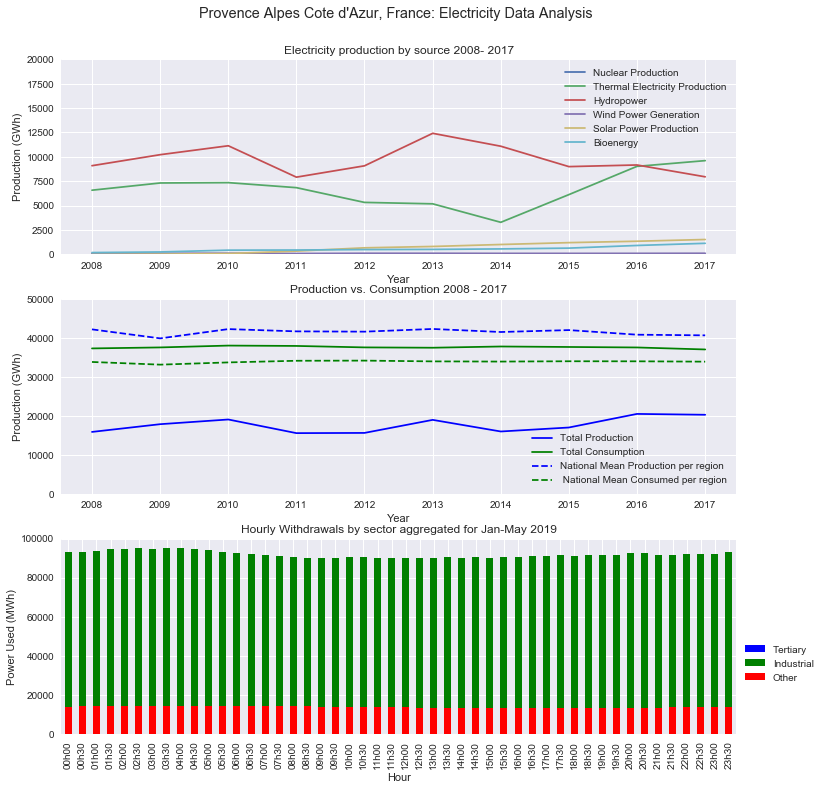

In [5]:
# Plotting
sns.set()
fig, ((ax1),(ax2),(ax3))= plt.subplots(3,1, figsize=(10,10))
plt.subplots_adjust(top=0.2, hspace= 0.2)
plt.tight_layout(h_pad=2.1)
fig.suptitle('Provence Alpes Cote d\'Azur, France: Electricity Data Analysis', x=0.5, y=1.05)

# Subplot 1: Production by source
ax1.plot(provence_df['Nuclear Production (GWh)'],
         label='Nuclear Production'
         )
ax1.plot(provence_df['Thermal Electricity Production (GWh)'],
                 label='Thermal Electricity Production')
ax1.plot(provence_df['Hydropower (GWh)'],
                 label='Hydropower')
ax1.plot(provence_df['Wind Power Generation (GWh)'],
                 label='Wind Power Generation')
ax1.plot(provence_df['Solar Power Production (GWh)'],
                 label='Solar Power Production')
ax1.plot(provence_df['Bioenergy (GWh)'], label='Bioenergy')


ax1.set(xlabel='Year',
       ylabel='Production (GWh)',
       title='Electricity production by source 2008- 2017')
ax1.legend(bbox_to_anchor=(1, 1))
ax1.set_ylim(0,20000)

#Subplot 2: Production over consumption
ax2.plot(provence_df.index,
         provence_df['Total Production (GWh)'],
         label= 'Total Production',
         color='b')
ax2.plot(conso_provence_df.index,
         conso_provence_df['Consommation nette corrigée (GWh)'],
         label='Total Consumption',
         color='g')
ax2.plot(prod_grouped_national.index,
         prod_grouped_national, 
         label= 'National Mean Production per region',
         linestyle='--',
         color='b')
ax2.plot(conso_national_df.index,
         conso_national_df,
         label=' National Mean Consumed per region',
         linestyle='--',
         color='g')
ax2.set(xlabel='Year',
        ylabel='Production (GWh)',
        title='Production vs. Consumption 2008 - 2017')
ax2.legend(frameon=False,loc='lower right')
        #bbox_to_anchor=(0.9, 1))
ax2.set_ylim(0,50000)

#Subplot3: Hourly use by sector
tertiaire_serie.T.plot(ax=ax3, kind='bar',stacked=True, label= 'Tertiary', color='b')
grande_industrie_serie.T.plot(ax=ax3, kind='bar',stacked=True, label= 'Industrial', color='g')
autre_serie.T.plot(ax= ax3, kind='bar', stacked=True, label='Other', color='r')
ax3.legend(['Tertiary','Industrial','Other'],
           frameon=False,bbox_to_anchor=(1, 0.5))
ax3.set(xlabel='Hour',
       ylabel='Power Used (MWh)',
       title='Hourly Withdrawals by sector aggregated for Jan-May 2019')
plt.savefig("Provence_energie",bbox_inches = "tight");
plt.show();


### Conclusion

The visual has three subplots that depict different aspects of the region's electricity use:

The first chart in the top plot addresses the question of what are the sources of locally made electricity: It shows that the region relies mostly on Hydropower and Thermal Electricity with a small but increasing input of 'green' energies (solar, bioenergy). It also shows that the region produces no nuclear power.

The middle chart shows the region's reliance on electricity produced outside the region. Its consumption level is at par with the country's mean level of consumption, but it produces around 17 GWh less than what the region needs to be self-sufficient in energy terms.

The last plot shows that the main use of energy comes from industrial use, this is interesting as it shows the industrial complex around Marseilles is the most voracious consumer of electricity. 

Choices made:

* Truthfulness: I chose a consistent time frame and chose to represent  all the data to help to make an objective assessment of the situation. I also added lines for national mean production and consumption as a reference for the reader.

* Beauty: The plots are easy to read and form part of a figure with an overall title as well as subtitles for each plot. Title fonts for the figure are larger than for subtitles. There is no overlap between labels and titles. The  color sheme is simple with a legend placement that is regularly placed to the right.

* Functionality: I chose line plots for the first two plots that are most appropriate to show levels and evolution of production and consumption over time. For the third plot, I chose a stacked bar plot that adds an easy way to see how energy is consumed over the time of day.

* Insightfulness: The reader can see at a glance that there are essential components in the production of electricity in the region (hydropower, thermal power) and absence of alternatives (nuclear, bio, wind) to supplement that production. The second plot shows that the region's electricity production does not allow it to support itself and that it relies on national production to sustain its levels of consumption. The third plot instantly shows what is the main use of electricity, namely industrial use.